In [1]:
import pymongo
import json

In [2]:
config_file = open("config.json")
config = json.load(config_file)
client = pymongo.MongoClient(config["mongo_server"])

In [3]:
db = client[config["mongo_database"]]
collection = db[config["mongo_collection"]["current"]]

In [11]:
ministry_count = {}

In [12]:
ministries = collection.distinct("ministry")

In [13]:
for ministry in ministries:
    ministry_count[ministry] = collection.count_documents({"ministry":ministry})

In [15]:
json.dump(ministry_count,open("ministry_count_16.json","w"))

In [18]:
from matplotlib import pyplot as plt

In [35]:
sorted_ministries = sorted(ministry_count, key=ministry_count.__getitem__, reverse=True)

In [37]:
sorted_values = [ministry_count[m] for m in sorted_ministries]

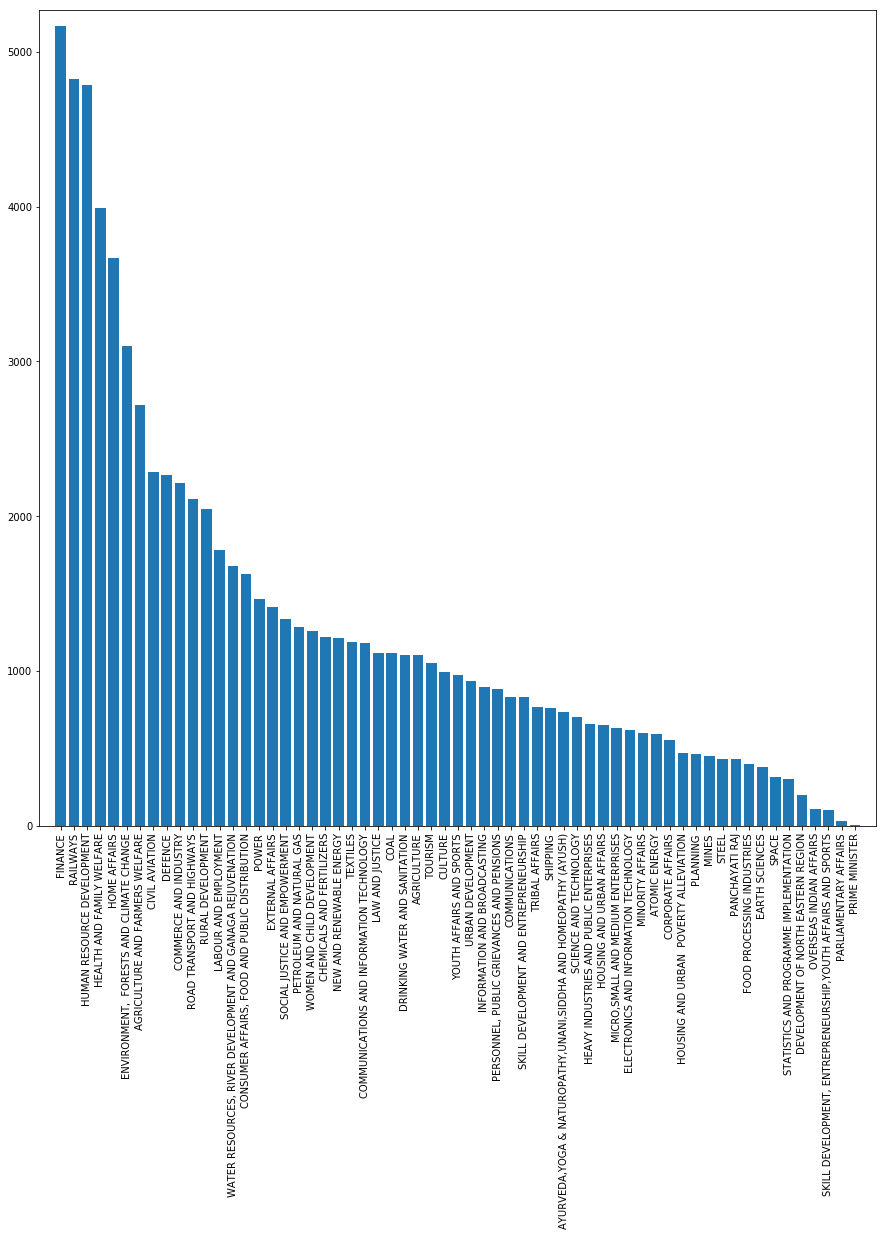

In [39]:
plt.figure(figsize=(15,15))
plt.bar(sorted_ministries,sorted_values)
plt.xticks(rotation="vertical")
plt.margins(0.02)

In [40]:
collection = db[config["mongo_collection"]["old"]]

In [45]:
collection.count_documents({"lsno":15})

30